<a href="https://colab.research.google.com/github/Rizwanali324/Deep_learning_images_Classification/blob/main/pizza_classifer_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rizwanali324","key":"d97171ba0d141d4062fe8885893b8dde"}'}

In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d projectshs/pizza-classification-data


 98% 99.0M/101M [00:06<00:00, 21.5MB/s]
100% 101M/101M [00:06<00:00, 17.0MB/s] 


In [ ]:
import zipfile
with zipfile.ZipFile('pizza-classification-data.zip', 'r') as zip_ref:
    zip_ref.extractall('pizza-classification-data')

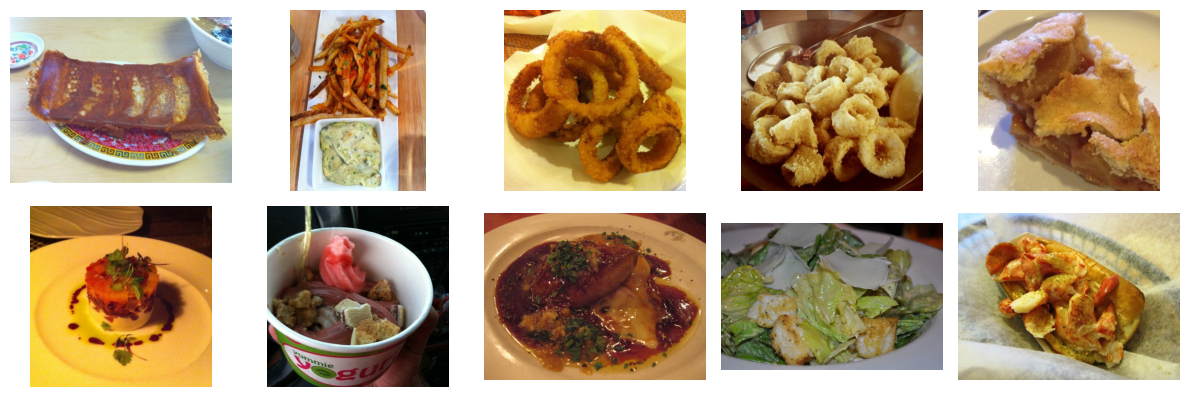

In [ ]:
from PIL import Image
import os

data_dir = '/content/pizza-classification-data/train'  # Change to the actual folder name

image_paths = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir)]

# Load and display the first 19 images
plt.figure(figsize=(12, 8))

for i, image_path in enumerate(image_paths[:10]):
    img = Image.open(image_path)
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()


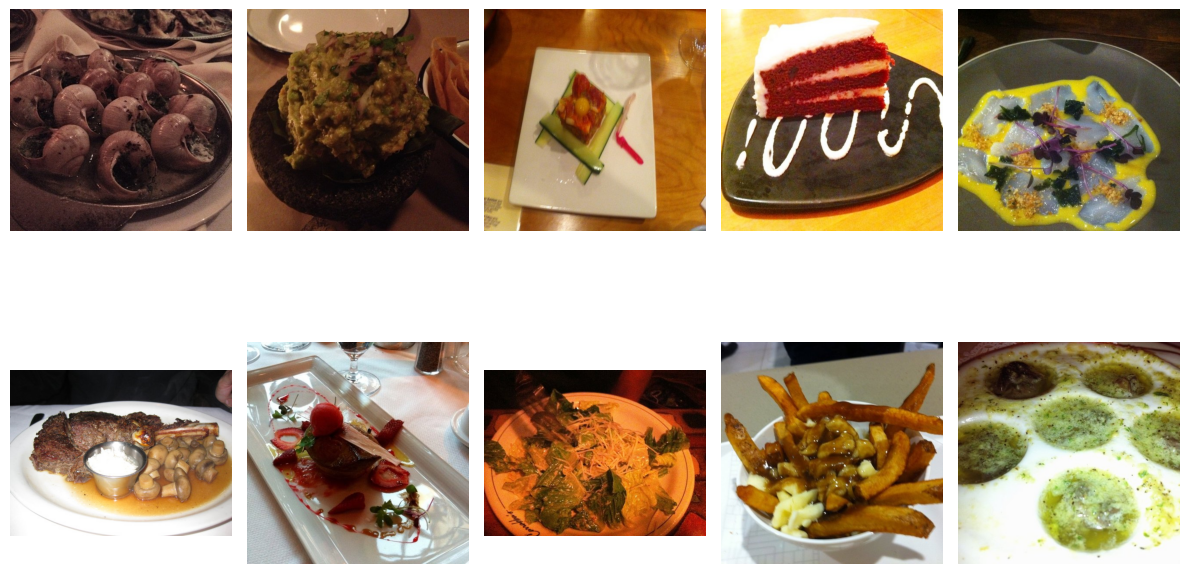

In [ ]:
from PIL import Image
import os
import random
import matplotlib.pyplot as plt

data_dir = '/content/pizza-classification-data/train/not_pizza'  # Change to the actual folder name

image_paths = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir)]

# Choose 10 random image paths
random_image_paths = random.sample(image_paths, 10)

# Load and display the random images
plt.figure(figsize=(12, 8))

for i, image_path in enumerate(random_image_paths):
    img = Image.open(image_path)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:


data_dir = '/content/pizza-classification-data/train/not_pizza'  # Change to the actual folder name

image_paths = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir)]

# Check the shape of the loaded image data
sample_image = Image.open(image_paths[0])
image_shape = np.array(sample_image).shape
print("Image Shape:", image_shape)

# Check the number of classes (assuming subfolders represent classes)
num_classes = len(os.listdir(data_dir))
print("Number of Classes:", num_classes)


Image Shape: (383, 512, 3)
Number of Classes: 800


In [ ]:
import os

data_dir = '/content/pizza-classification-data/train'  # Change to the actual folder name

class_names = os.listdir(data_dir)
print("Class Names:", class_names)


Class Names: ['pizza', 'not_pizza']


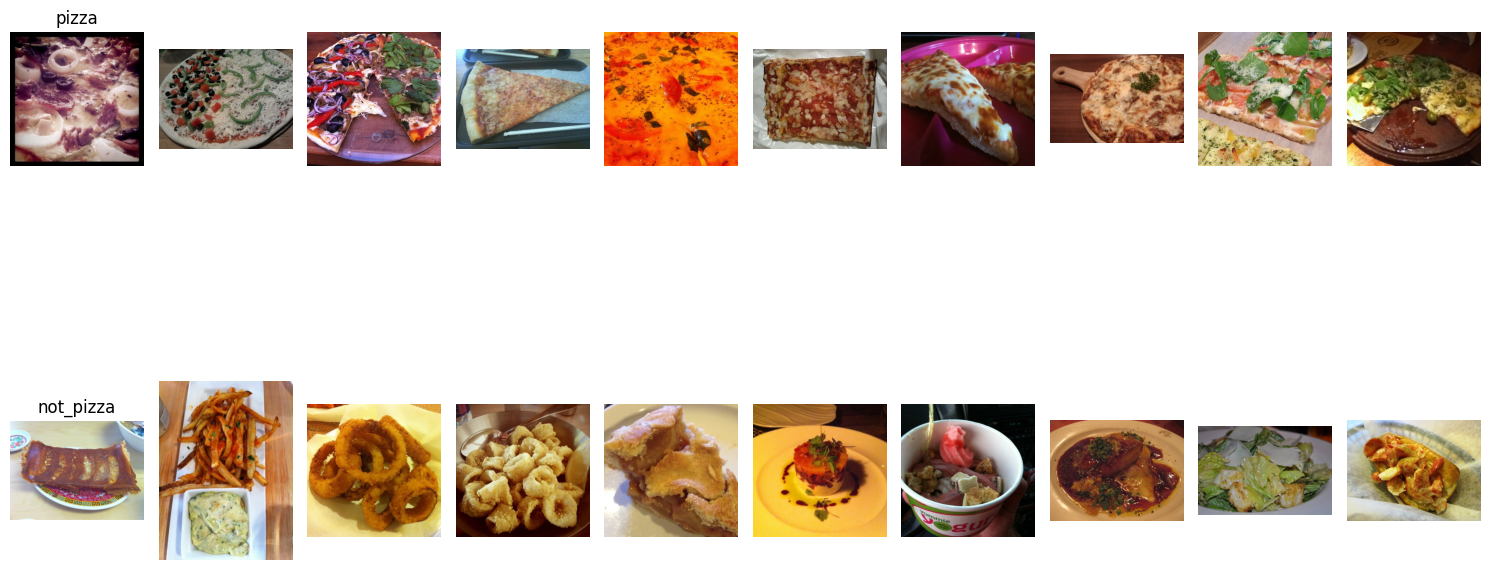

In [ ]:


data_dir = '/content/pizza-classification-data/train'  # Change to the actual folder name

class_names = os.listdir(data_dir)

plt.figure(figsize=(15, 10))

for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    image_paths = [os.path.join(class_dir, filename) for filename in os.listdir(class_dir)[:10]]

    for j, image_path in enumerate(image_paths):
        img = Image.open(image_path)
        plt.subplot(len(class_names), 10, i * 10 + j + 1)
        plt.imshow(img)
        plt.axis('off')
        if j == 0:
            plt.title(class_name)

plt.tight_layout()
plt.show()


Found 1280 images belonging to 2 classes.
Found 320 images belonging to 2 classes.
Classes: ['not_pizza', 'pizza']


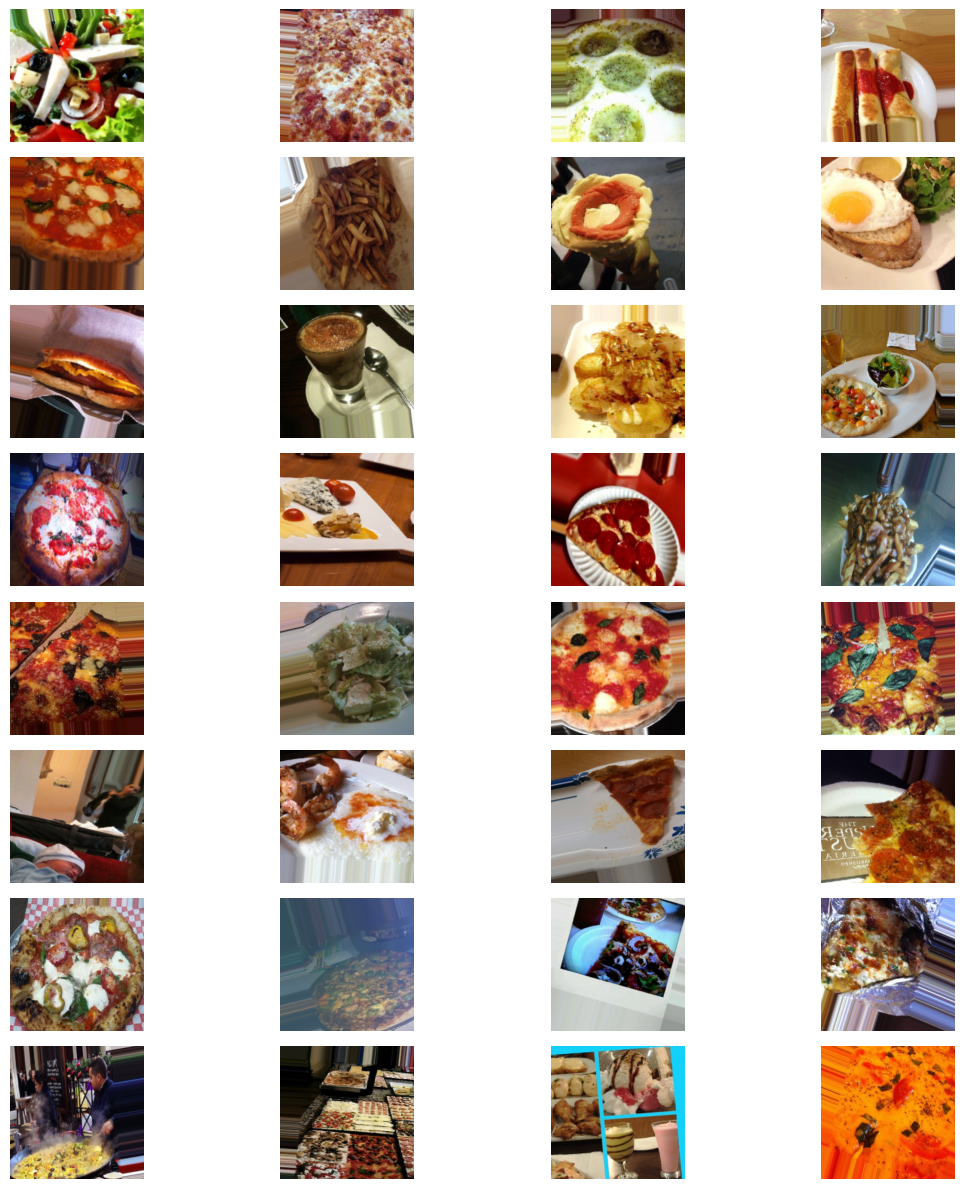

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation settings
datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = datagen.flow_from_directory(
    data_dir,
    subset='training',
    target_size=(224, 224),
    batch_size=32
)

validation_data = datagen.flow_from_directory(
    data_dir,
    subset='validation',
    target_size=(224, 224),
    batch_size=32
)

# Display the classes
classes = list(train_data.class_indices.keys())
print("Classes:", classes)

# Display a batch of augmented training images
sample_batch = next(train_data)
plt.figure(figsize=(12, 12))
for i in range(32):
    plt.subplot(8, 4, i+1)
    plt.imshow(sample_batch[0][i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (224, 224, 3)  # Adjust based on your dataset

# Build the model
input_layer = Input(shape=input_shape)

# Convolutional layers
conv1 = Conv2D(96, (11, 11), strides=(4, 4), activation='relu')(input_layer)
pool1 = MaxPooling2D((3, 3), strides=(2, 2))(conv1)

conv2 = Conv2D(256, (5, 5), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((3, 3), strides=(2, 2))(conv2)

conv3 = Conv2D(384, (3, 3), activation='relu', padding='same')(pool2)
conv4 = Conv2D(384, (3, 3), activation='relu', padding='same')(conv3)
conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
pool3 = MaxPooling2D((3, 3), strides=(2, 2))(conv5)

# Fully connected layers
flatten = Flatten()(pool3)
fc1 = Dense(4096, activation='relu')(flatten)
dropout1 = Dropout(0.5)(fc1)

fc2 = Dense(4096, activation='relu')(dropout1)
dropout2 = Dropout(0.5)(fc2)
num_classes=2
output_layer = Dense(num_classes, activation='softmax')(dropout2)  # num_classes is the number of classes in your dataset

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)
# Set pre-trained layers as non-trainable (include_top=False)
for layer in model.layers[:-6]:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       885120

In [ ]:
# Fit the model using training and validation data
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10,  # Adjust the number of epochs as needed
    steps_per_epoch=len(train_data),
    validation_steps=len(validation_data)
)




Epoch 1/10
40/40 [==============================] - 48s 983ms/step - loss: 0.7534 - accuracy: 0.5258 - val_loss: 0.6658 - val_accuracy: 0.5250
Epoch 2/10
40/40 [==============================] - 23s 568ms/step - loss: 0.6742 - accuracy: 0.5906 - val_loss: 0.6235 - val_accuracy: 0.6875
Epoch 3/10
40/40 [==============================] - 22s 560ms/step - loss: 0.6455 - accuracy: 0.6523 - val_loss: 0.5905 - val_accuracy: 0.7500
Epoch 4/10
40/40 [==============================] - 21s 536ms/step - loss: 0.5924 - accuracy: 0.6961 - val_loss: 0.5561 - val_accuracy: 0.6938
Epoch 5/10
40/40 [==============================] - 22s 560ms/step - loss: 0.6205 - accuracy: 0.6516 - val_loss: 0.5853 - val_accuracy: 0.7063
Epoch 6/10
40/40 [==============================] - 23s 557ms/step - loss: 0.5969 - accuracy: 0.6836 - val_loss: 0.5752 - val_accuracy: 0.7250
Epoch 7/10
40/40 [==============================] - 22s 553ms/step - loss: 0.5719 - accuracy: 0.7078 - val_loss: 0.5373 - val_accuracy: 0.7531

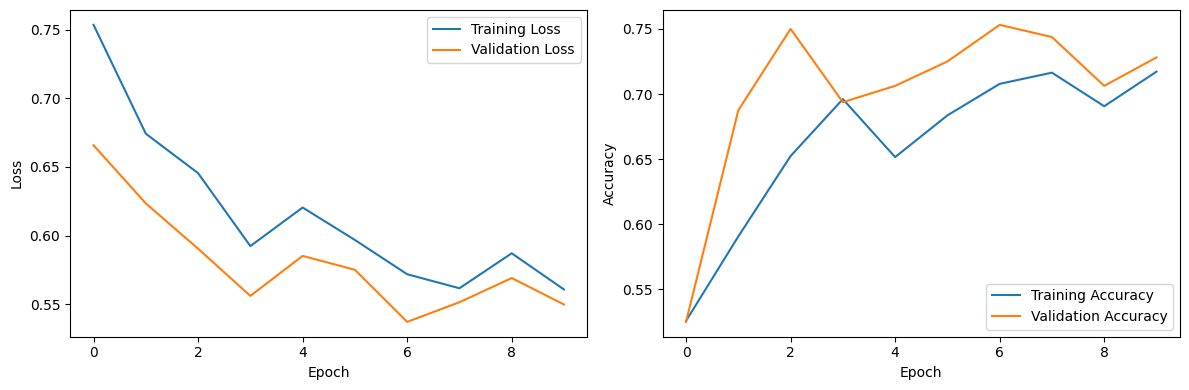

In [ ]:
plt.figure(figsize=(12, 4))

# Plot training loss and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


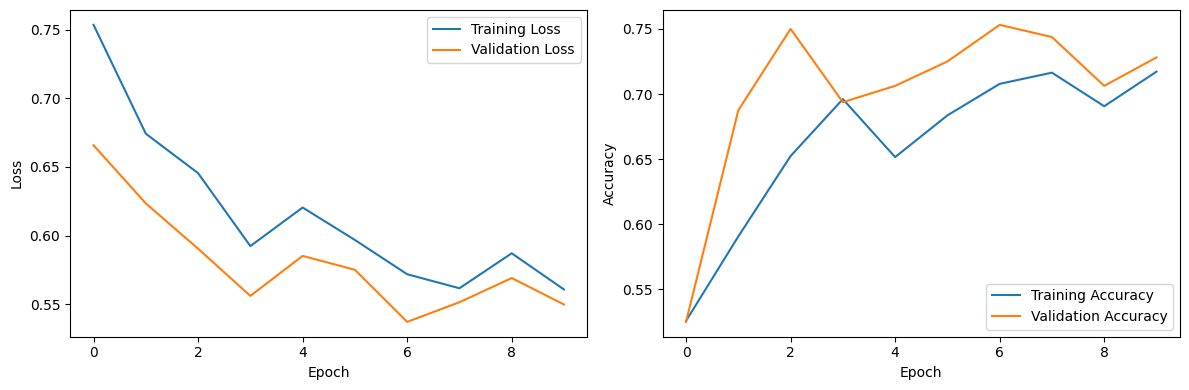

In [ ]:
plt.figure(figsize=(12, 4))

# Plot training loss and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


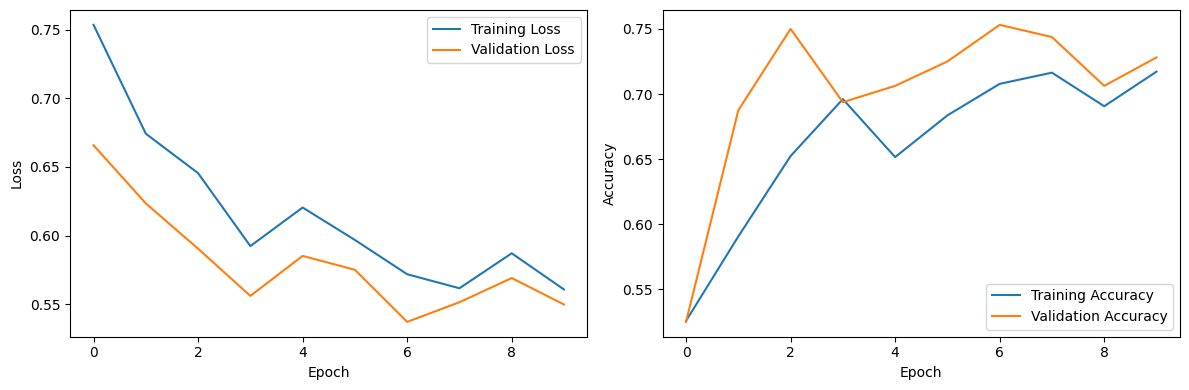

In [ ]:
plt.figure(figsize=(12, 4))

# Plot training loss and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
